In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mno
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
df = pd.read_csv(r"D:\DATA PELATIHAN\carprice.csv", index_col='ID')
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90


## EKsplorasi Data

In [25]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage_kmpl         float64
Engine_CC            float64
Power_bhp            float64
Seats                float64
Price                float64
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5953 entries, 1 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5953 non-null   object 
 1   Location           5953 non-null   object 
 2   Year               5953 non-null   int64  
 3   Kilometers_Driven  5953 non-null   int64  
 4   Fuel_Type          5953 non-null   object 
 5   Transmission       5953 non-null   object 
 6   Owner_Type         5953 non-null   object 
 7   Mileage_kmpl       5951 non-null   float64
 8   Engine_CC          5917 non-null   float64
 9   Power_bhp          5811 non-null   float64
 10  Seats              5911 non-null   float64
 11  Price              5953 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 604.6+ KB


<Axes: >

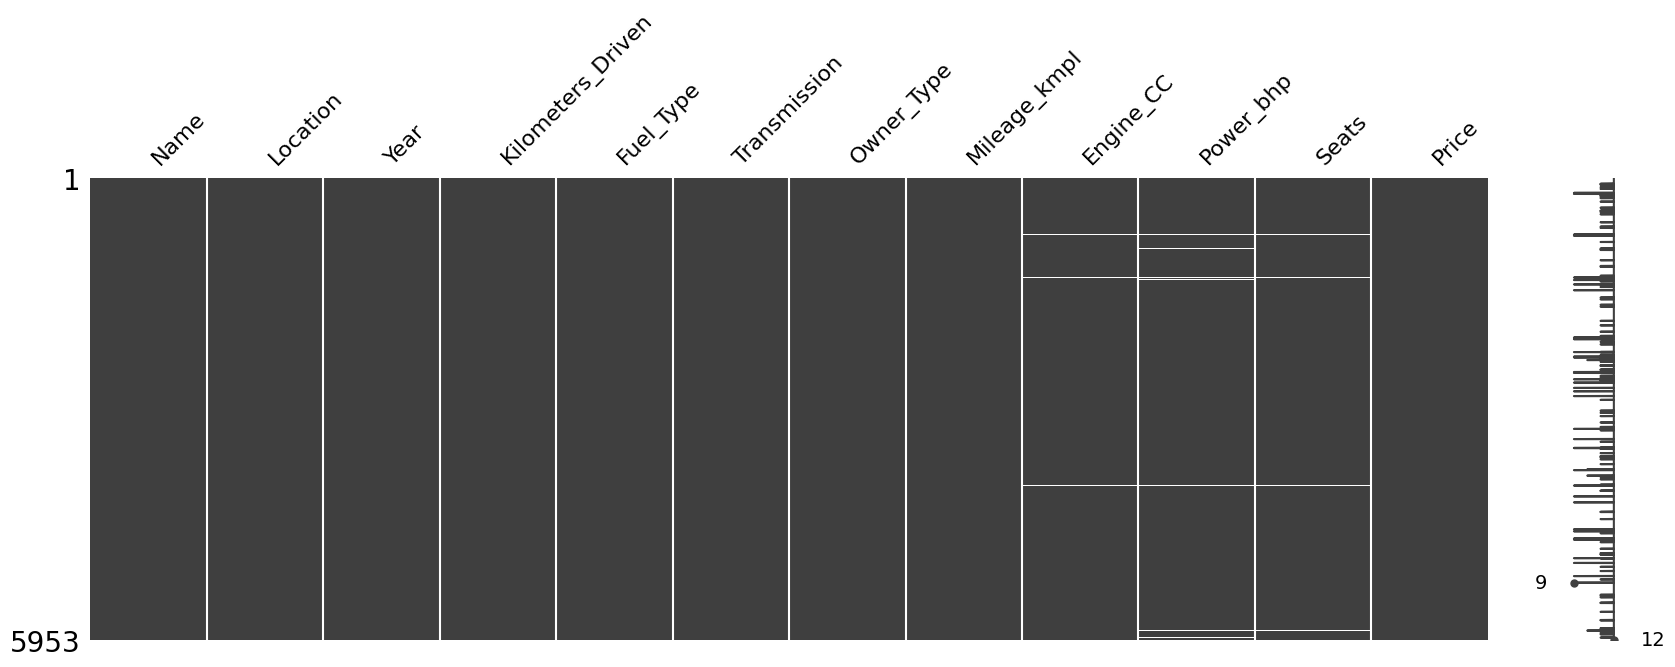

In [27]:
mno.matrix(df, figsize=(20,6))

## Melihat index keberapa bernilai NaN

In [28]:
df[pd.isna(df['Engine_CC'])| 
   pd.isna(df['Mileage_kmpl'])|
   pd.isna(df['Power_bhp'])|
   pd.isna(df['Seats'])]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,1.20
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,NaN,NaN,1.75
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,NaN,5.0,2.85


In [29]:
df1 = pd.DataFrame(df.groupby(['Year','Transmission','Location'])['Transmission'].size())

df1

Transmission
Year Transmission Location               
1998 Automatic    Mumbai                1
     Manual       Hyderabad             1
                  Jaipur                2
1999 Manual       Jaipur                1
                  Pune                  1
...                                   ...
2019 Manual       Jaipur                1
                  Kochi                21
                  Kolkata               2
                  Mumbai                2
                  Pune                  1

[344 rows x 1 columns]

In [30]:
df1.columns = ['Total_car']

df1

Total_car
Year Transmission Location            
1998 Automatic    Mumbai             1
     Manual       Hyderabad          1
                  Jaipur             2
1999 Manual       Jaipur             1
                  Pune               1
...                                ...
2019 Manual       Jaipur             1
                  Kochi             21
                  Kolkata            2
                  Mumbai             2
                  Pune               1

[344 rows x 1 columns]

In [31]:
df1 = df1.reset_index()

df1.head(20)

,Year,Transmission,Location,Total_car
0,1998,Automatic,Mumbai,1
1,1998,Manual,Hyderabad,1
2,1998,Manual,Jaipur,2
3,1999,Manual,Jaipur,1
4,1999,Manual,Pune,1
5,2000,Manual,Hyderabad,1
6,2000,Manual,Jaipur,1
7,2000,Manual,Kolkata,1
8,2000,Manual,Pune,1
9,2001,Manual,Chennai,2


In [32]:
df1['Location'].unique()

array(['Mumbai', 'Hyderabad', 'Jaipur', 'Pune', 'Kolkata', 'Chennai',
       'Ahmedabad', 'Bangalore', 'Kochi', 'Coimbatore', 'Delhi'],
      dtype=object)

In [33]:
df1['Hyderabad'] = np.where(df1['Location'] == 'Hyderabad', df1['Total_car'], 0)
df1['Jaipur'] = np.where(df1['Location'] == 'Jaipur', df1['Total_car'], 0)
df1['Mumbai'] = np.where(df1['Location'] == 'Mumbai', df1['Total_car'], 0)
df1['Pune'] = np.where(df1['Location'] == 'Pune', df1['Total_car'], 0)
df1['Kolkata'] = np.where(df1['Location'] == 'Kolkata', df1['Total_car'], 0)
df1['Chennai'] = np.where(df1['Location'] == 'Chennai', df1['Total_car'], 0)
df1['Ahmedabad'] = np.where(df1['Location'] == 'Ahmedabad', df1['Total_car'], 0)
df1['Bangalore'] = np.where(df1['Location'] == 'Bangalore', df1['Total_car'], 0)
df1['kochi'] = np.where(df1['Location'] == 'Kochi', df1['Total_car'], 0)
df1['Coimbatore'] = np.where(df1['Location'] == 'Coimbatore', df1['Total_car'], 0)
df1['Delhi'] = np.where(df1['Location'] == 'Delhi', df1['Total_car'], 0)

In [34]:
df2 = df1.groupby(['Year','Transmission']).sum().reset_index()

df2

C:\Users\Asani\AppData\Local\Temp\ipykernel_16232\3477904960.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df1.groupby(['Year','Transmission']).sum().reset_index()


,Year,Transmission,Total_car,Hyderabad,Jaipur,Mumbai,Pune,Kolkata,Chennai,Ahmedabad,Bangalore,kochi,Coimbatore,Delhi
0,1998,Automatic,1,0,0,1,0,0,0,0,0,0,0,0
1,1998,Manual,3,1,2,0,0,0,0,0,0,0,0,0
2,1999,Manual,2,0,1,0,1,0,0,0,0,0,0,0
3,2000,Manual,4,1,1,0,1,1,0,0,0,0,0,0
4,2001,Manual,8,0,2,1,3,0,2,0,0,0,0,0
5,2002,Manual,15,1,2,1,1,1,6,1,2,0,0,0
6,2003,Automatic,2,0,0,1,0,0,1,0,0,0,0,0
7,2003,Manual,15,1,1,1,5,1,5,0,0,1,0,0
8,2004,Automatic,6,1,1,1,0,0,2,0,0,1,0,0
9,2004,Manual,25,3,5,2,7,0,4,1,1,0,2,0


### FAKTA: 
bahwa pada tahun 1999 - 2002 tidak ada mobil dengan Automatic Transmission yang di produksi pada kota di india seperti 'Mumbai', 'Hyderabad', 'Jaipur', 'Pune', 'Kolkata', 'Chennai','Ahmedabad', 'Bangalore', 'Kochi', 'Coimbatore', 'Delhi'

### Melihat visualisasi data banyak mobil dengan Manual Transmisiton di setiap kota pada negara India

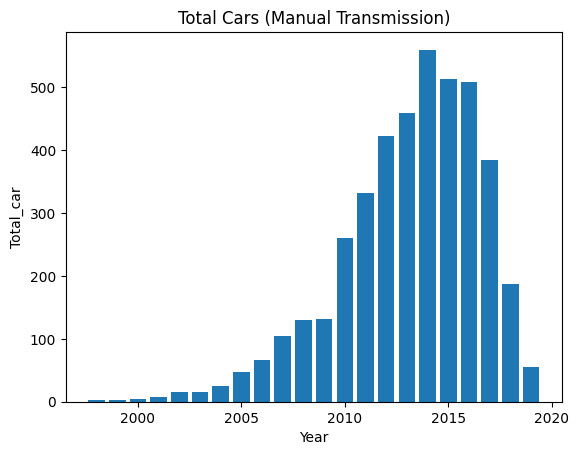

In [43]:
# Filter data berdasarkan Transmission = Manual
filtered_df2 = df2[df2['Transmission'] == 'Manual']

# Membuat diagram batang berdasarkan kolom "Year" dan "Total Cars" (hanya data Manual)
plt.bar(filtered_df2['Year'], filtered_df2['Total_car'])

# Menambahkan judul diagram dan label sumbu
plt.title('Total Cars (Manual Transmission)')
plt.xlabel('Year')
plt.ylabel('Total_car')

# Menampilkan diagram
plt.show()

### Melihat visualisasi data banyak mobil dengan Automatic Transmisiton di setiap kota pada negara India

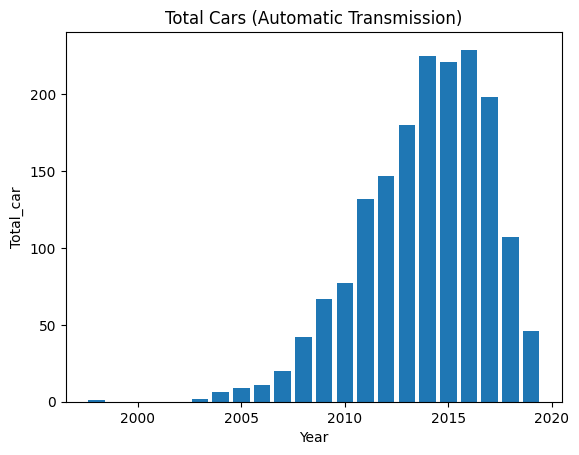

In [42]:
# Filter data berdasarkan Transmission = Manual
filtered_df2 = df2[df2['Transmission'] == 'Automatic']

# Membuat diagram batang berdasarkan kolom "Year" dan "Total Cars" (hanya data Manual)
plt.bar(filtered_df2['Year'], filtered_df2['Total_car'])

# Menambahkan judul diagram dan label sumbu
plt.title('Total Cars (Automatic Transmission)')
plt.xlabel('Year')
plt.ylabel('Total_car')

# Menampilkan diagram
plt.show()

### Mengabungkan Grafik banyaknya mobil menggunakan manual Transmission dan Automatic Transmission dalam satu Frame 

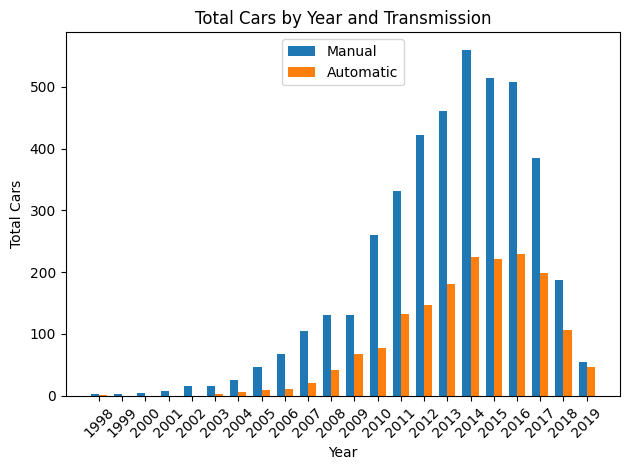

In [47]:
# Menggabungkan total mobil berdasarkan tahun dan transmission
df2_grouped = df2.groupby(['Year', 'Transmission']).sum().reset_index()

# Pivot table berdasarkan kolom Transmission
df2_pivot = df2_grouped.pivot_table(values='Total_car', index='Year', columns='Transmission')

# Mengatur lebar bar
lebar_bar = 0.35

# Mengatur posisi grup bar
posisi_bar1 = df2_pivot.index
posisi_bar2 = [x + lebar_bar for x in posisi_bar1]

# Membuat diagram batang terkelompok
plt.bar(posisi_bar1, df2_pivot['Manual'], lebar_bar, label='Manual')
plt.bar(posisi_bar2, df2_pivot['Automatic'], lebar_bar, label='Automatic')

# Menambahkan judul diagram dan label sumbu
plt.title('Total Cars by Year and Transmission')
plt.xlabel('Year')
plt.ylabel('Total Cars')

# Menambahkan label pada sumbu x dengan rotasi 45 derajat
plt.xticks(posisi_bar1 + lebar_bar/2, df2_pivot.index, rotation=45)

# Menambahkan legenda
plt.legend()

# Menyesuaikan posisi elemen-elemen dalam gambar
plt.tight_layout()

# Menampilkan diagram
plt.show()

### FAKTA:
Produksi Mobil dengan Manual Transmission lebih banyak dibandingkan produksi dari pada mobil dengan Automatic Transmission dari tahun 1999 sampai 2019

## Melihat Perkembangan Mobil yang menggunakan manual transmission dan Automatic transmission pada setiap kota

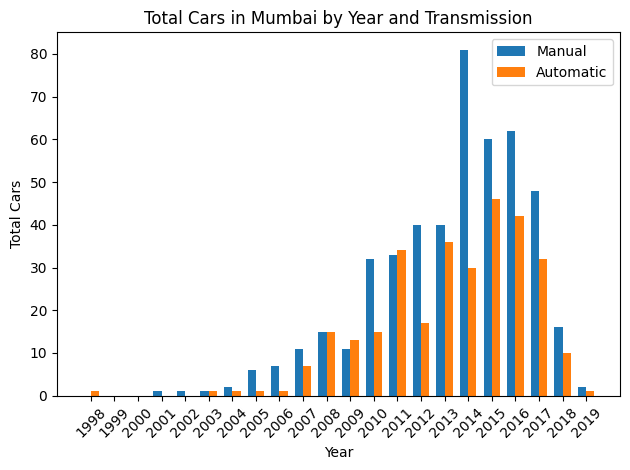

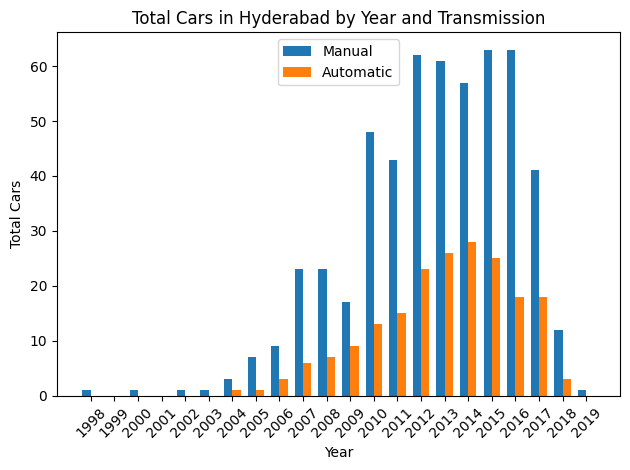

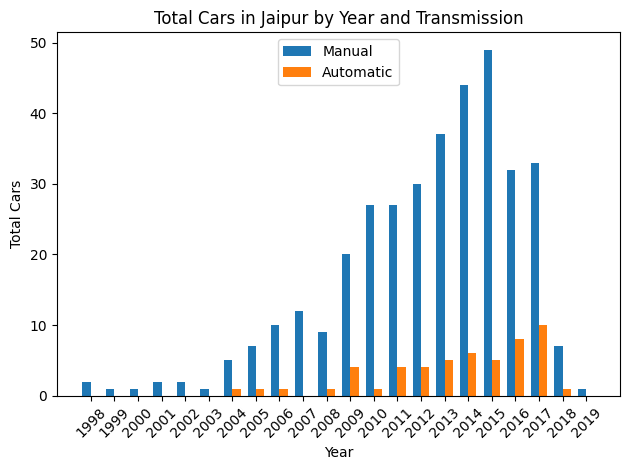

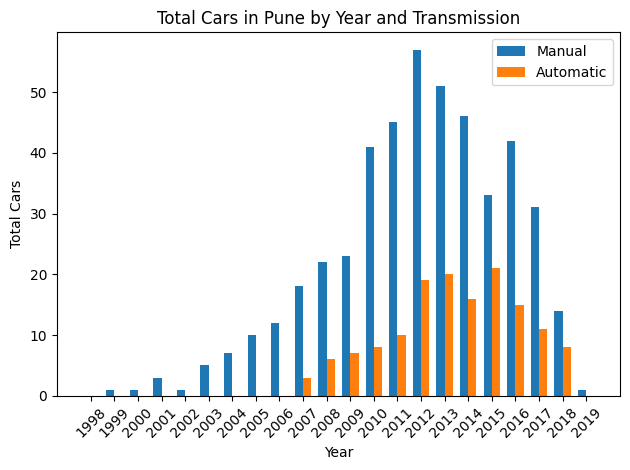

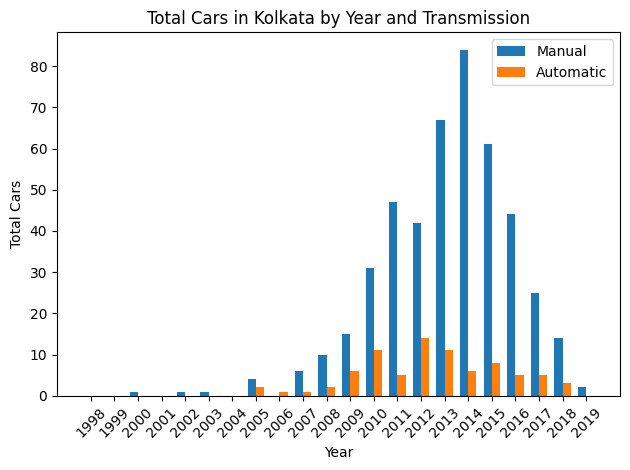

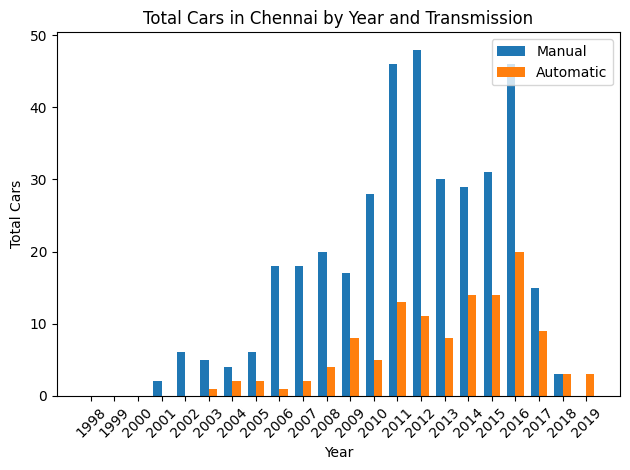

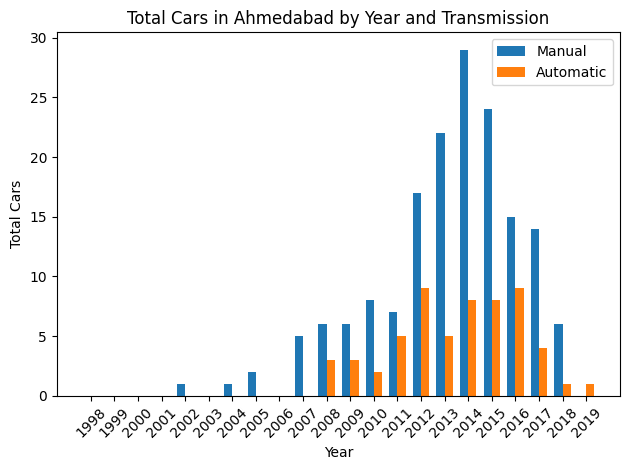

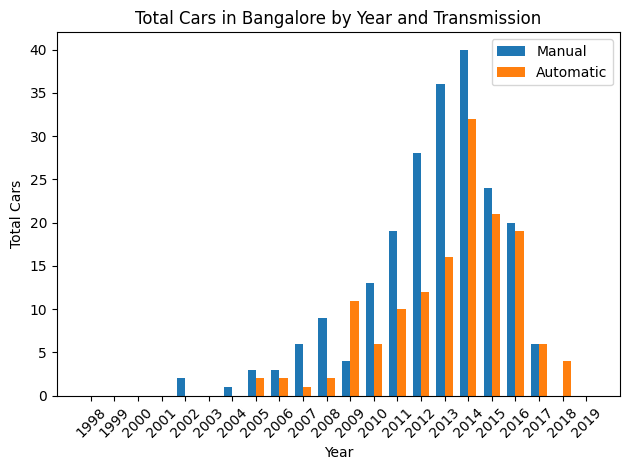

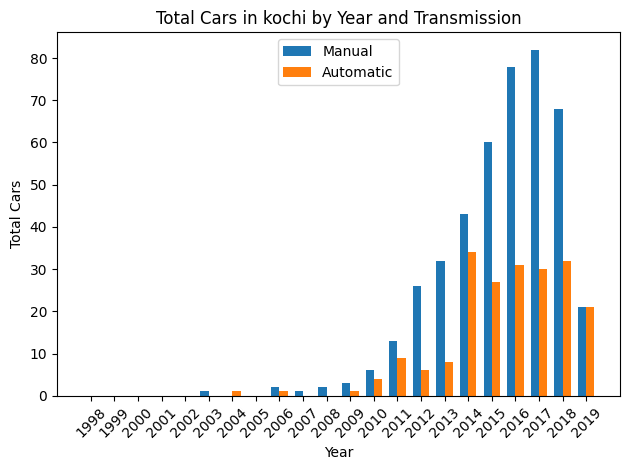

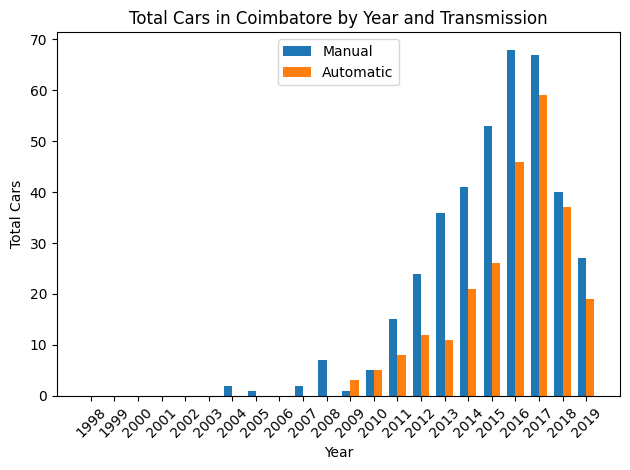

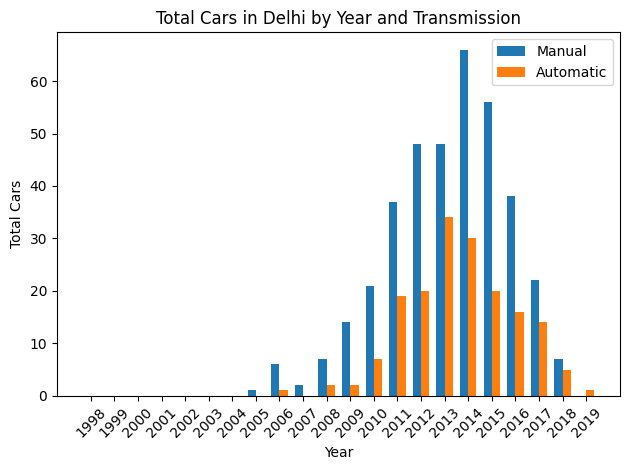

In [50]:
# Menggabungkan total mobil berdasarkan tahun dan transmisi untuk setiap kota
df2_grouped = df2.groupby(['Year', 'Transmission']).sum().reset_index()

# Membuat diagram batang untuk setiap kota
cities = ['Mumbai', 'Hyderabad', 'Jaipur', 'Pune', 'Kolkata', 'Chennai',
          'Ahmedabad', 'Bangalore', 'kochi', 'Coimbatore', 'Delhi']

for city in cities:
    city_data = df2_grouped[['Year', 'Transmission', city]]
    city_pivot = city_data.pivot(index='Year', columns='Transmission', values=city)
    
    # Mengatur posisi grup bar
    posisi_bar1 = city_pivot.index
    posisi_bar2 = [x + 0.35 for x in posisi_bar1]
    
    # Membuat diagram batang terkelompok untuk setiap kota
    plt.bar(posisi_bar1, city_pivot['Manual'], 0.35, label='Manual')
    plt.bar(posisi_bar2, city_pivot['Automatic'], 0.35, label='Automatic')
    
    # Menambahkan judul diagram dan label sumbu
    plt.title(f'Total Cars in {city} by Year and Transmission')
    plt.xlabel('Year')
    plt.ylabel('Total Cars')
    
    # Menambahkan label pada sumbu x
    plt.xticks(posisi_bar1 + 0.35/2, city_pivot.index, rotation=45)
    
    # Menambahkan legenda
    plt.legend()
    
    # Menyesuaikan posisi elemen-elemen dalam gambar
    plt.tight_layout()

    # Menampilkan diagram batang
    plt.show()

### FAKTA:
pada tahun 2019 dari grafik di atas bahwa beberapa kota sudah tidak lagi menggunakan Mobil yang menggunakan Manual Transmission